<a href="https://colab.research.google.com/github/100jy/voice_competition/blob/master/MFCC_80_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
import keras
from tqdm import tqdm
from glob import glob
from scipy.io import wavfile
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout, Activation, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import librosa
import librosa.display

Using TensorFlow backend.


In [3]:
y_train = pd.read_csv('drive/My Drive/data/train_answer.csv',index_col=0)
y_train = y_train.values
y_train.shape

(100000, 30)

# 데이터 확인 및 채널 추가


In [4]:
#MFCC
x_train = pd.read_pickle('drive/My Drive/data/x_trian_mfcc_80.pickle')
source = x_train.values


##normalize
def normalize(x):
  return (x - np.mean(x)) / np.std(x)

## binary
def make_binary(x):
  np.ones_like(len(x))
  mask = (x > 0)
  return np.ones_like(len(x)) * mask
 
binary = list((map(make_binary,source)))
binary =  np.array(binary)

x_nor = list((map(normalize,source)))
x_nor = np.array(x_nor)

## 결과 확인

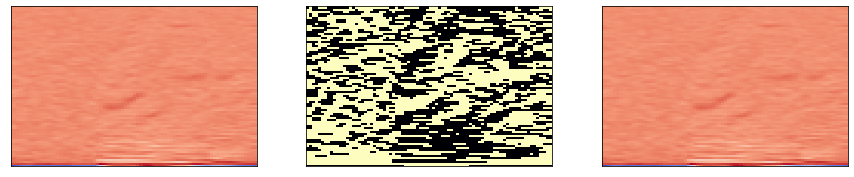

In [ ]:
mfcc = [source[0].reshape(80,-1),binary[0].reshape(80,-1),x_nor[0].reshape(80,-1)]
plt.figure(figsize=(15,10))

for i in range(3):
  st = '33'+str(i+1)
  plt.subplot(st)
  librosa.display.specshow(mfcc[i])

In [5]:
x_nor = x_nor.reshape(100000,80,-1,1)
binary = binary.reshape(100000,80,-1,1)

In [ ]:
x_nor.shape

(100000, 80, 80, 1)

In [6]:
# 데이터 2ch로 수정...
x_train = np.concatenate((x_nor.T, binary.T), axis=0)
x_train.shape

(2, 80, 80, 100000)

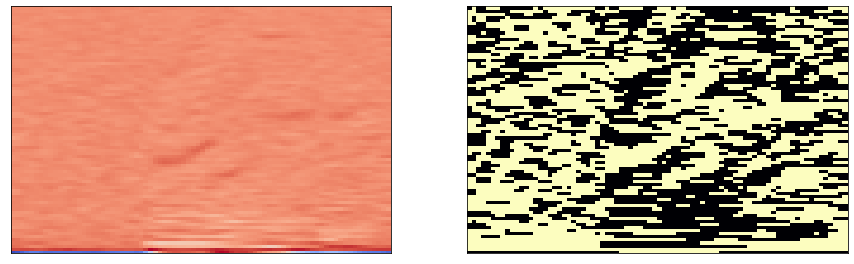

In [ ]:
plt.figure(figsize=(15,10))
for i in range(2):
  st = '22'+str(i+1)
  plt.subplot(st)
  librosa.display.specshow(x_train[i].T[0])

In [7]:
x_train = x_train.T

In [8]:
x_train.shape

(100000, 80, 80, 2)

# model architecture

In [ ]:
### padding valid, dropout 0.3, shorter fully-conneted
##GlobalAveragePooling
#CNN
model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),activation='relu', input_shape = (x_train.shape[1], x_train.shape[2],2)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(GlobalAveragePooling2D())

#fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30, activation='softmax'))
model.compile(loss=keras.losses.KLDivergence(), optimizer = 'adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 78, 78, 64)        1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 128)        

In [ ]:
### padding valid, dropout 0.3, shorter fully-conneted
##GlobalAveragePooling
#CNN
model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),activation='relu', input_shape = (x_train.shape[1], x_train.shape[2],2)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(GlobalAveragePooling2D())

#fully connected layer
#1-layer add
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30, activation='softmax'))
model.compile(loss=keras.losses.KLDivergence(), optimizer = 'adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 78, 78, 64)        1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 128)        

In [ ]:
#deep_cnn
#from https://buomsoo-kim.github.io/keras/2018/05/05/Easy-deep-learning-with-Keras-11.md/ 
model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),
                      input_shape = (x_train.shape[1], x_train.shape[2],2), padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())

#fully connected layer
#1-layer add
##BatchNormalization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))
model.compile(loss=keras.losses.KLDivergence(), optimizer = 'adam')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 80, 80, 64)        1216      
_________________________________________________________________
batch_normalization_47 (Batc (None, 80, 80, 64)        256       
_________________________________________________________________
activation_47 (Activation)   (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 80, 80, 64)        36928     
_________________________________________________________________
batch_normalization_48 (Batc (None, 80, 80, 64)        256       
_________________________________________________________________
activation_48 (Activation)   (None, 80, 80, 64)        0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 40, 40, 64)      

In [9]:
#DeepCNN with Gelu
def gelu(x):
    return 0.5*x*(1+tf.tanh(np.sqrt(2/np.pi)*(x+0.044715*tf.pow(x, 3))))

#deep_cnn
#from https://buomsoo-kim.github.io/keras/2018/05/05/Easy-deep-learning-with-Keras-11.md/ 
#similar to VGG16
model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),
                      input_shape = (x_train.shape[1], x_train.shape[2],2), padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation(gelu))
model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(gelu))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(gelu))
model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(gelu))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(gelu))
model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(gelu))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(gelu))
model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1),padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(gelu))
model.add(MaxPooling2D((2,2)))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())

#fully connected layer
#1-layer add
##BatchNormalization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))
model.compile(loss=keras.losses.KLDivergence(), optimizer = 'adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 64)        1216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 80, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 80, 80, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 80, 80, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 64)       

In [10]:
model_path = 'drive/My Drive/data/model_2D_80/'
if not os.path.exists(model_path):
  os.mkdir(model_path)

# validattion 기준 모델 갱신
model_file = model_path + 'epoch_{epoch:03d}_val_{val_loss:3f}.hdf5'
checkpoint = ModelCheckpoint(filepath = model_file, monitor = 'val_loss', verbose = 1, save_best_only =True)

#10회간 validatation 좋아지지 않으면 early stop
#early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)
early_stop = EarlyStopping(monitor = 'val_loss', patience = 20)

history = model.fit(x_train, y_train, epochs = 100, batch_size = 64, validation_split = 0.2, shuffle = True,
                    callbacks = [checkpoint, early_stop])

Train on 80000 samples, validate on 20000 samples
Epoch 1/100
80000/80000 [==============================] - 173s 2ms/step - loss: 1.8881 - val_loss: 1.7290

Epoch 00001: val_loss improved from inf to 1.72899, saving model to drive/My Drive/data/model_2D_80/epoch_001_val_1.728994.hdf5
Epoch 2/100
80000/80000 [==============================] - 165s 2ms/step - loss: 1.6110 - val_loss: 1.5047

Epoch 00002: val_loss improved from 1.72899 to 1.50466, saving model to drive/My Drive/data/model_2D_80/epoch_002_val_1.504661.hdf5
Epoch 3/100
80000/80000 [==============================] - 166s 2ms/step - loss: 1.4688 - val_loss: 1.3521

Epoch 00003: val_loss improved from 1.50466 to 1.35213, saving model to drive/My Drive/data/model_2D_80/epoch_003_val_1.352131.hdf5
Epoch 4/100
80000/80000 [==============================] - 166s 2ms/step - loss: 1.3710 - val_loss: 1.4005

Epoch 00004: val_loss did not improve from 1.35213
Epoch 5/100
80000/80000 [==============================] - 166s 2ms/step - 

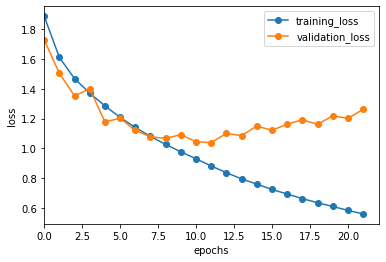

In [11]:
plt.plot(history.epoch, history.history['loss'], '-o', label='training_loss')
plt.plot(history.epoch, history.history['val_loss'], '-o', label='validation_loss')
plt.legend()
plt.xlim(left=0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [12]:
x_test = pd.read_pickle('drive/My Drive/data/x_test_mfcc_80.pickle')
source_test = x_test.values
 
binary_test = list((map(make_binary,source_test)))
binary_test =  np.array(binary_test)

x_nor_test = list((map(normalize,source_test)))
x_nor_test = np.array(x_nor_test)

x_nor_test = x_nor_test.reshape(10000,80,-1,1)
binary_test = binary_test.reshape(10000,80,-1,1)
x_test = np.concatenate((x_nor_test.T, binary_test.T), axis=0)
x_test = x_test.T

In [13]:
x_test.shape

(10000, 80, 80, 2)

In [14]:
# 가장 좋은 모델의 weight를 불러옵니다.
weigth_file = glob('drive/My Drive/data/model_2D_80/*.hdf5')[-1]
print(weigth_file)
model.load_weights(weigth_file)

# 예측 수행
y_pred = model.predict(x_test)

# 예측 결과로 제출 파일을 생성합니다.
submission = pd.read_csv('drive/My Drive/data/submission.csv', index_col=0)
submission.loc[:, :] = y_pred
submission.to_csv('drive/My Drive/data/submission.csv')

drive/My Drive/data/model_2D_80/epoch_012_val_1.038679.hdf5


# 7/23

--------------------------------------

**모델** : epoch_015_val_**1.122891**..hdf5(2D model_deepCNN)
  
**데이터**: x_trian_mfcc_80
  
**score** : **1.17593**

--------------------------------------

**모델** : epoch_012_val_**1.038679**.hdf5(2D model_deepCNN,GELU)
  
**데이터**: x_trian_mfcc_80
  
**score** : **1.0831**

--------------------------------------